## Import the necessary packages

In [3]:
#pip install pandas

In [4]:
#pip install numpy 

In [5]:
#pip install scipy

In [6]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
from collections import Counter,namedtuple,defaultdict,OrderedDict
import warnings
warnings.filterwarnings('ignore')

## Load the datasets present in 100-EMR-data folder

## Performing Exploratory Data Analysis (EDA) steps on 4 different tables

## 1] AdmissionsCorePopulatedTable

### 1.1) Load the dataset

In [7]:
data_AdmissionCorePopulatedTable=pd.read_csv("/home/admin/Desktop/100-EMR-data/AdmissionsCorePopulatedTable.txt",sep="\t")
data_AdmissionCorePopulatedTable.head()

,PatientID,AdmissionID,AdmissionStartDate,AdmissionEndDate
0,7A025E77-7832-4F53-B9A7-09A3F98AC17E,7,2011-10-12 14:55:02.027,2011-10-22 01:16:07.557
1,DCE5AEB8-6DB9-4106-8AE4-02CCC5C23741,1,1993-02-11 18:57:04.003,1993-02-24 17:22:29.713
2,DCE5AEB8-6DB9-4106-8AE4-02CCC5C23741,2,2002-11-28 19:06:31.117,2002-12-04 19:14:40.797
3,DCE5AEB8-6DB9-4106-8AE4-02CCC5C23741,3,2011-07-19 18:42:45.287,2011-07-25 04:57:42.053
4,886B5885-1EE2-49F3-98D5-A2F02EB8A9D4,1,1994-12-03 22:20:46.077,1994-12-20 20:24:56.010


In [8]:
data_AdmissionCorePopulatedTable.tail()

,PatientID,AdmissionID,AdmissionStartDate,AdmissionEndDate
367,7A025E77-7832-4F53-B9A7-09A3F98AC17E,2,1982-10-14 07:01:43.613,1982-10-21 16:44:00.310
368,7A025E77-7832-4F53-B9A7-09A3F98AC17E,3,1990-02-23 04:28:34.457,1990-03-13 15:55:29.837
369,7A025E77-7832-4F53-B9A7-09A3F98AC17E,4,1994-05-15 11:34:00.840,1994-05-19 23:04:04.877
370,7A025E77-7832-4F53-B9A7-09A3F98AC17E,5,2001-01-10 11:04:58.943,2001-01-27 00:54:18.730
371,7A025E77-7832-4F53-B9A7-09A3F98AC17E,6,2001-12-29 20:28:01.050,2002-01-18 18:16:04.423


### 1.2)EDA steps

In [9]:
data_AdmissionCorePopulatedTable.columns

Index(['PatientID', 'AdmissionID', 'AdmissionStartDate', 'AdmissionEndDate'], dtype='object')

In [10]:
data_AdmissionCorePopulatedTable.dtypes

PatientID             object
AdmissionID            int64
AdmissionStartDate    object
AdmissionEndDate      object
dtype: object

In [11]:
data_AdmissionCorePopulatedTable.shape

(372, 4)

In [12]:
data_AdmissionCorePopulatedTable.size

1488

In [13]:
data_AdmissionCorePopulatedTable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   PatientID           372 non-null    object
 1   AdmissionID         372 non-null    int64 
 2   AdmissionStartDate  372 non-null    object
 3   AdmissionEndDate    372 non-null    object
dtypes: int64(1), object(3)
memory usage: 11.8+ KB


In [14]:
data_AdmissionCorePopulatedTable.describe()

,AdmissionID
count,372.000000
mean,2.653226
std,1.476013
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,7.000000


In [15]:
data_AdmissionCorePopulatedTable.count()

PatientID             372
AdmissionID           372
AdmissionStartDate    372
AdmissionEndDate      372
dtype: int64

In [16]:
data_AdmissionCorePopulatedTable.isna().sum().to_frame().T

,PatientID,AdmissionID,AdmissionStartDate,AdmissionEndDate
0,0,0,0,0


In [17]:
data_AdmissionCorePopulatedTable.index

RangeIndex(start=0, stop=372, step=1)

In [18]:
data_AdmissionCorePopulatedTable.duplicated().sum()

0

In [19]:
Counter(data_AdmissionCorePopulatedTable.AdmissionID)

Counter({7: 5, 1: 100, 2: 96, 3: 78, 4: 50, 5: 32, 6: 11})

In [20]:
#Counter(data_AdmissionCorePopulatedTable.PatientID)

## 1.3) Detecting Outliers inside the AdmissionsCorePopulatedTable

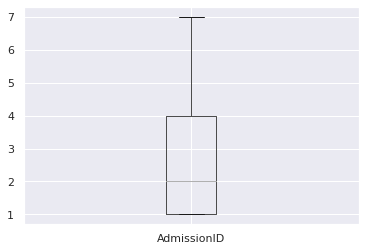

In [21]:
data_AdmissionCorePopulatedTable.boxplot()

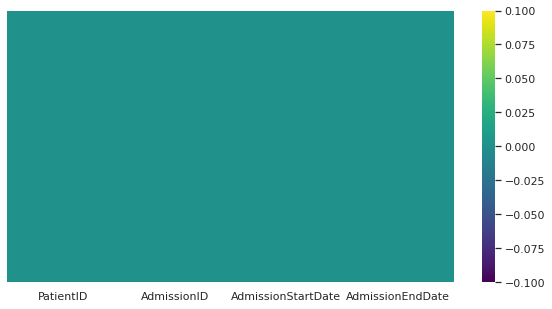

In [22]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.heatmap(data_AdmissionCorePopulatedTable.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [23]:
data_AdmissionID=data_AdmissionCorePopulatedTable.groupby(['AdmissionID'])['PatientID'].count()
data_AdmissionID

AdmissionID
1    100
2     96
3     78
4     50
5     32
6     11
7      5
Name: PatientID, dtype: int64

Text(0.5, 1.0, 'Count of Patient ID with respect to Admission ID')

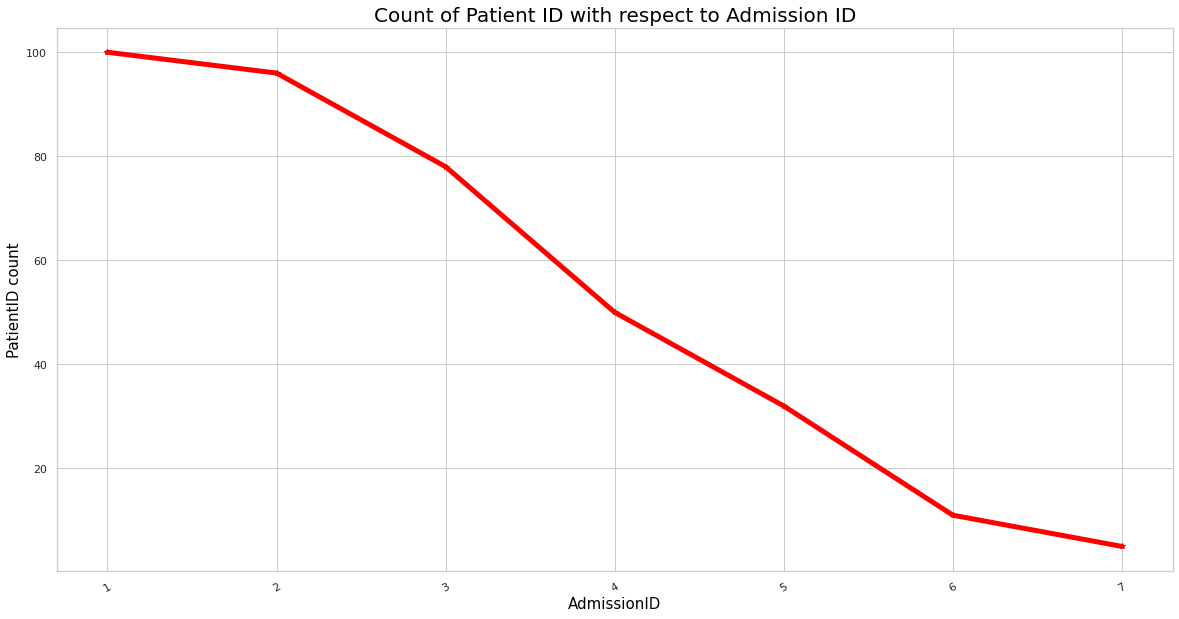

In [24]:
plt.figure(figsize=(20,10))
splot= plt.plot(data_AdmissionID,color='red',lw=5,marker='*')
plt.xticks(rotation=30)
plt.xlabel("AdmissionID",fontsize=15,color='black')
plt.ylabel("PatientID count",fontsize=15,color='black')
plt.title("Count of Patient ID with respect to Admission ID",fontdict={'fontsize':20,'color':'black'})

# ---------------------------------------------------------------------------------------------------------------

## 2] AdmissionsDiagnosesCorePopulatedTable

### 2.1) Load the dataset

In [25]:
data_AdmissionsDiagnosesCorePopulatedTable=pd.read_csv("/home/admin/Desktop/100-EMR-data/AdmissionsDiagnosesCorePopulatedTable.txt",sep="\t")
data_AdmissionsDiagnosesCorePopulatedTable.head()

,PatientID,AdmissionID,PrimaryDiagnosisCode,PrimaryDiagnosisDescription
0,80AC01B2-BD55-4BE0-A59A-4024104CF4E9,2,M01.X,Direct infection of joint in infectious and pa...
1,80AC01B2-BD55-4BE0-A59A-4024104CF4E9,3,D65,Disseminated intravascular coagulation [defibr...
2,80AC01B2-BD55-4BE0-A59A-4024104CF4E9,4,C92.1,"Chronic myeloid leukemia, BCR/ABL-positive"
3,80AC01B2-BD55-4BE0-A59A-4024104CF4E9,5,M05.51,Rheumatoid polyneuropathy with rheumatoid arth...
4,6A57AC0C-57F3-4C19-98A1-51135EFBC4FF,1,C91.00,Acute lymphoblastic leukemia not having achiev...


In [26]:
data_AdmissionsDiagnosesCorePopulatedTable.tail()

,PatientID,AdmissionID,PrimaryDiagnosisCode,PrimaryDiagnosisDescription
367,2A8772FE-61DB-483E-B6BF-6C0A74BA9C2A,3,H15,Disorders of sclera
368,C65A4ADE-112E-49E4-B72A-0DED22C242ED,1,M05.27,Rheumatoid vasculitis with rheumatoid arthriti...
369,C65A4ADE-112E-49E4-B72A-0DED22C242ED,2,N16,Renal tubulo-interstitial disorders in disease...
370,C65A4ADE-112E-49E4-B72A-0DED22C242ED,3,D35.2,Benign neoplasm of pituitary gland
371,80AC01B2-BD55-4BE0-A59A-4024104CF4E9,1,F06.1,Catatonic disorder due to known physiological ...


### 2.2) EDA steps

In [27]:
data_AdmissionsDiagnosesCorePopulatedTable.columns

Index(['PatientID', 'AdmissionID', 'PrimaryDiagnosisCode',
       'PrimaryDiagnosisDescription'],
      dtype='object')

In [28]:
data_AdmissionsDiagnosesCorePopulatedTable.dtypes

PatientID                      object
AdmissionID                     int64
PrimaryDiagnosisCode           object
PrimaryDiagnosisDescription    object
dtype: object

In [29]:
data_AdmissionsDiagnosesCorePopulatedTable.size

1488

In [30]:
data_AdmissionsDiagnosesCorePopulatedTable.shape

(372, 4)

In [31]:
data_AdmissionsDiagnosesCorePopulatedTable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   PatientID                    372 non-null    object
 1   AdmissionID                  372 non-null    int64 
 2   PrimaryDiagnosisCode         372 non-null    object
 3   PrimaryDiagnosisDescription  372 non-null    object
dtypes: int64(1), object(3)
memory usage: 11.8+ KB


In [32]:
data_AdmissionsDiagnosesCorePopulatedTable.describe()

,AdmissionID
count,372.000000
mean,2.653226
std,1.476013
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,7.000000


In [33]:
data_AdmissionsDiagnosesCorePopulatedTable.count()

PatientID                      372
AdmissionID                    372
PrimaryDiagnosisCode           372
PrimaryDiagnosisDescription    372
dtype: int64

In [34]:
data_AdmissionsDiagnosesCorePopulatedTable.isna().sum().to_frame().T

,PatientID,AdmissionID,PrimaryDiagnosisCode,PrimaryDiagnosisDescription
0,0,0,0,0


In [35]:
data_AdmissionsDiagnosesCorePopulatedTable.index

RangeIndex(start=0, stop=372, step=1)

In [36]:
data_AdmissionsDiagnosesCorePopulatedTable.duplicated().sum()

0

In [42]:
#Counter(data_AdmissionsDiagnosesCorePopulatedTable.PatientID)

In [43]:
Counter(data_AdmissionsDiagnosesCorePopulatedTable.AdmissionID)

Counter({2: 96, 3: 78, 4: 50, 5: 32, 1: 100, 6: 11, 7: 5})

In [45]:
#Counter(data_AdmissionsDiagnosesCorePopulatedTable.PrimaryDiagnosisCode)

In [46]:
#Counter(data_AdmissionsDiagnosesCorePopulatedTable.PrimaryDiagnosisDescription)

### 2.3) Detecting Outliers inside the AdmissionsDiagnosesCorePopulatedTable

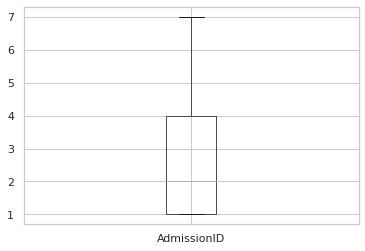

In [47]:
data_AdmissionsDiagnosesCorePopulatedTable.boxplot();

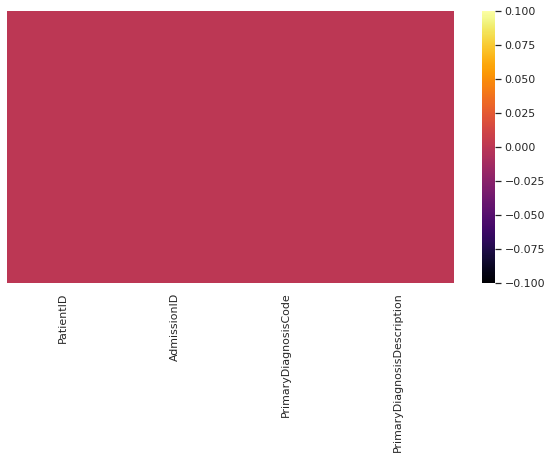

In [48]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.heatmap(data_AdmissionsDiagnosesCorePopulatedTable.isnull(),yticklabels=False,cbar=True,cmap='inferno')

In [49]:
data_PatientID2=data_AdmissionsDiagnosesCorePopulatedTable.groupby(by=['AdmissionID'])['PatientID'].count()
data_PatientID2

AdmissionID
1    100
2     96
3     78
4     50
5     32
6     11
7      5
Name: PatientID, dtype: int64

Text(0.5, 1.0, 'Count of Patient ID with respect to Admission ID')

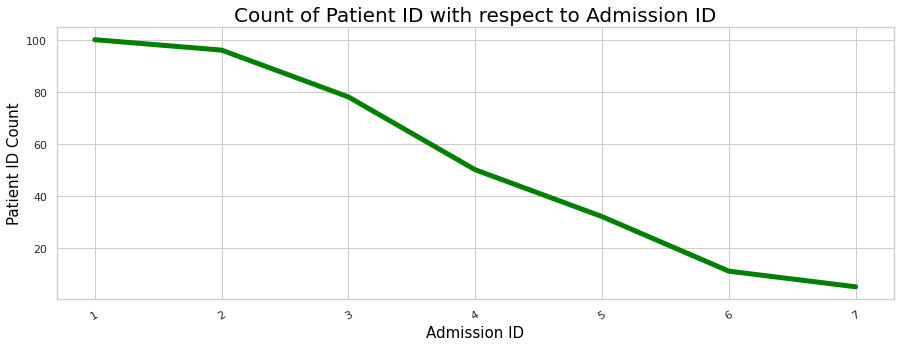

In [50]:
plt.figure(figsize=(15,5))
splot= plt.plot(data_PatientID2,color='green',lw=5)
plt.xticks(rotation=30)
plt.xlabel("Admission ID",fontsize=15,color='black')
plt.ylabel("Patient ID Count",fontsize=15,color='black')
plt.title("Count of Patient ID with respect to Admission ID",fontdict={'fontsize':20,'color':'black'})

In [51]:
data_diagnosis=data_AdmissionsDiagnosesCorePopulatedTable.groupby(by=['AdmissionID'])['PrimaryDiagnosisCode'].count()
data_diagnosis

AdmissionID
1    100
2     96
3     78
4     50
5     32
6     11
7      5
Name: PrimaryDiagnosisCode, dtype: int64

Text(0.5, 1.0, 'Count of Primary Diagnosis Code with respect to Admission ID')

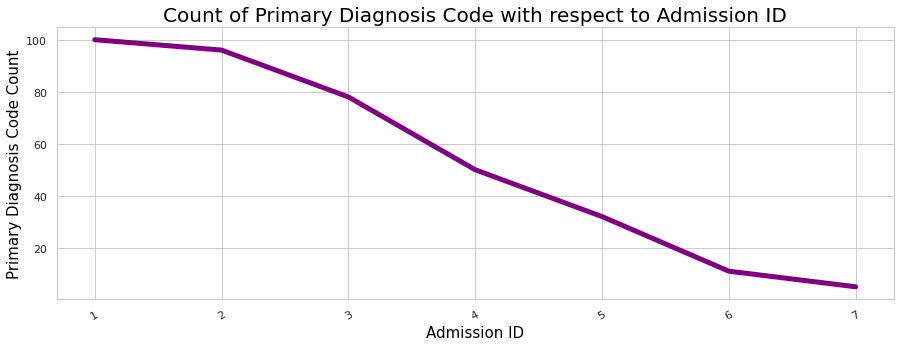

In [52]:
plt.figure(figsize=(15,5))
splot= plt.plot(data_diagnosis,color='purple',lw=5)
plt.xticks(rotation=30)
plt.xlabel("Admission ID",fontsize=15,color='black')
plt.ylabel("Primary Diagnosis Code Count",fontsize=15,color='black')
plt.title("Count of Primary Diagnosis Code with respect to Admission ID",fontdict={'fontsize':20,'color':'black'})

In [53]:
data_diagnosisdescription=data_AdmissionsDiagnosesCorePopulatedTable.groupby(by=['AdmissionID'])['PrimaryDiagnosisDescription'].count()
data_diagnosisdescription

AdmissionID
1    100
2     96
3     78
4     50
5     32
6     11
7      5
Name: PrimaryDiagnosisDescription, dtype: int64

Text(0.5, 1.0, 'Count of Primary Diagnosis Description with respect to Admission ID')

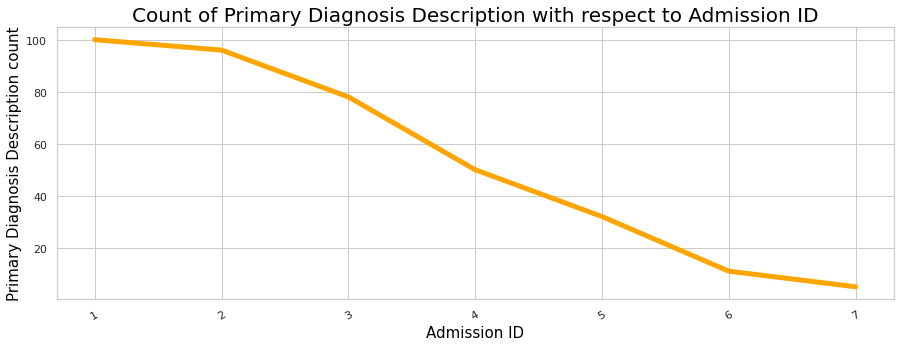

In [54]:
plt.figure(figsize=(15,5))
splot= plt.plot(data_diagnosis,color='orange',lw=5)
plt.xticks(rotation=30)
plt.xlabel("Admission ID",fontsize=15,color='black')
plt.ylabel("Primary Diagnosis Description count",fontsize=15,color='black')
plt.title("Count of Primary Diagnosis Description with respect to Admission ID",fontdict={'fontsize':20,'color':'black'})

# ---------------------------------------------------------------------------------------------------------------

## 3] LabsCorePopulatedTable

### 3.1) Load the dataset

In [55]:
data_LabsCorePopulatedTable=pd.read_csv("/home/admin/Desktop/100-EMR-data/LabsCorePopulatedTable.txt",sep="\t")
data_LabsCorePopulatedTable.head()

,PatientID,AdmissionID,LabName,LabValue,LabUnits,LabDateTime
0,1A8791E3-A61C-455A-8DEE-763EB90C9B2C,1,URINALYSIS: RED BLOOD CELLS,1.8,rbc/hpf,1992-07-01 01:36:17.910
1,1A8791E3-A61C-455A-8DEE-763EB90C9B2C,1,METABOLIC: GLUCOSE,103.3,mg/dL,1992-06-30 09:35:52.383
2,1A8791E3-A61C-455A-8DEE-763EB90C9B2C,1,CBC: MCH,35.8,pg,1992-06-30 03:50:11.777
3,1A8791E3-A61C-455A-8DEE-763EB90C9B2C,1,METABOLIC: CALCIUM,8.9,mg/dL,1992-06-30 12:09:46.107
4,1A8791E3-A61C-455A-8DEE-763EB90C9B2C,1,CBC: RED BLOOD CELL COUNT,4.8,m/cumm,1992-07-01 01:31:08.677


In [56]:
data_LabsCorePopulatedTable.tail()

,PatientID,AdmissionID,LabName,LabValue,LabUnits,LabDateTime
111478,F0B53A2C-98CA-415D-B928-E3FD0E52B22A,6,CBC: HEMOGLOBIN,13.6,gm/dl,2012-04-21 03:23:50.883
111479,F0B53A2C-98CA-415D-B928-E3FD0E52B22A,6,CBC: MCH,26.2,pg,2012-04-21 03:18:44.127
111480,F0B53A2C-98CA-415D-B928-E3FD0E52B22A,6,METABOLIC: CHLORIDE,104.4,mmol/L,2012-04-21 02:58:57.840
111481,F0B53A2C-98CA-415D-B928-E3FD0E52B22A,6,METABOLIC: GLUCOSE,63.3,mg/dL,2012-04-21 02:50:04.503
111482,F0B53A2C-98CA-415D-B928-E3FD0E52B22A,6,CBC: MCHC,38.6,g/dl,2012-04-21 03:27:10.293


### 3.2) EDA Steps

In [57]:
data_LabsCorePopulatedTable.dtypes

PatientID       object
AdmissionID      int64
LabName         object
LabValue       float64
LabUnits        object
LabDateTime     object
dtype: object

In [58]:
data_LabsCorePopulatedTable.columns

Index(['PatientID', 'AdmissionID', 'LabName', 'LabValue', 'LabUnits',
       'LabDateTime'],
      dtype='object')

In [59]:
data_LabsCorePopulatedTable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111483 entries, 0 to 111482
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PatientID    111483 non-null  object 
 1   AdmissionID  111483 non-null  int64  
 2   LabName      111483 non-null  object 
 3   LabValue     111483 non-null  float64
 4   LabUnits     111483 non-null  object 
 5   LabDateTime  111483 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 5.1+ MB


In [60]:
data_LabsCorePopulatedTable.describe()

,AdmissionID,LabValue
count,111483.000000,111483.000000
mean,2.662756,34.999722
std,1.493165,58.247715
min,1.000000,0.000000
25%,1.000000,3.300000
50%,2.000000,10.600000
75%,4.000000,37.900000
max,7.000000,449.900000


In [61]:
data_LabsCorePopulatedTable.shape

(111483, 6)

In [62]:
data_LabsCorePopulatedTable.size

668898

In [63]:
data_LabsCorePopulatedTable.count()

PatientID      111483
AdmissionID    111483
LabName        111483
LabValue       111483
LabUnits       111483
LabDateTime    111483
dtype: int64

In [64]:
data_LabsCorePopulatedTable.isna().sum().to_frame().T

,PatientID,AdmissionID,LabName,LabValue,LabUnits,LabDateTime
0,0,0,0,0,0,0


In [65]:
data_LabsCorePopulatedTable.index

RangeIndex(start=0, stop=111483, step=1)

In [66]:
data_LabsCorePopulatedTable.duplicated().sum()

0

In [67]:
Counter(data_LabsCorePopulatedTable.PatientID)

Counter({'1A8791E3-A61C-455A-8DEE-763EB90C9B2C': 803,
         '81C5B13B-F6B2-4E57-9593-6E7E4C13B2CE': 1566,
         '220C8D43-1322-4A9D-B890-D426942A3649': 1082,
         'C242E3A4-E785-4DF1-A0E4-3B568DC88F2E': 704,
         '0BC491C5-5A45-4067-BD11-A78BEA00D3BE': 725,
         '79A7BA2A-D35A-4CB8-A835-6BAA13B0058C': 1145,
         'FFCDECD6-4048-4DCB-B910-1218160005B3': 1136,
         'CD2ADB1B-97F7-4EF6-BC5C-3E0EC562A06F': 1613,
         'A50BE9B4-8A0B-4169-B894-F7BD86D7D90B': 130,
         '69CC25ED-A54A-4BAF-97E3-774BB3C9DED1': 556,
         '69B5D2A0-12FD-46EF-A5FF-B29C4BAFBE49': 1276,
         '8D389A8C-A6D8-4447-9DDE-1A28AB4EC667': 1357,
         '967987B9-FFEF-4776-85CF-AE05CA81F583': 1454,
         '9BBF3A51-443D-438B-9289-B98B8E0577C0': 622,
         '6D8008ED-D623-4BE4-B93B-335F9797C170': 1116,
         'B3892204-880B-40EF-B3BB-B824B50E99E5': 1371,
         '49DADA25-F2C2-42BB-8210-D78E6C7B0D48': 657,
         '7548B6CF-79D9-461D-A0C5-20B861406FAC': 1324,
         'B5D31F0

In [68]:
Counter(data_LabsCorePopulatedTable.AdmissionID)

Counter({1: 29562, 2: 29214, 3: 24178, 4: 13907, 5: 8745, 6: 4164, 7: 1713})

In [69]:
Counter(data_LabsCorePopulatedTable.LabName)

Counter({'URINALYSIS: RED BLOOD CELLS': 3187,
         'METABOLIC: GLUCOSE': 3202,
         'CBC: MCH': 3191,
         'METABOLIC: CALCIUM': 3179,
         'CBC: RED BLOOD CELL COUNT': 3174,
         'URINALYSIS: PH': 3187,
         'METABOLIC: TOTAL PROTEIN': 3177,
         'METABOLIC: CHLORIDE': 3190,
         'CBC: LYMPHOCYTES': 3162,
         'CBC: ABSOLUTE LYMPHOCYTES': 3162,
         'METABOLIC: SODIUM': 3207,
         'URINALYSIS: SPECIFIC GRAVITY': 3181,
         'METABOLIC: BILI TOTAL': 3182,
         'URINALYSIS: WHITE BLOOD CELLS': 3218,
         'CBC: EOSINOPHILS': 3191,
         'METABOLIC: ALK PHOS': 3154,
         'CBC: RDW': 3188,
         'METABOLIC: AST/SGOT': 3179,
         'METABOLIC: CREATININE': 3193,
         'CBC: NEUTROPHILS': 3224,
         'CBC: BASOPHILS': 3165,
         'CBC: MONOCYTES': 3129,
         'METABOLIC: BUN': 3158,
         'CBC: WHITE BLOOD CELL COUNT': 3209,
         'CBC: PLATELET COUNT': 3177,
         'METABOLIC: POTASSIUM': 3185,
         '

In [71]:
# Counter(data_LabsCorePopulatedTable.LabValue)

In [72]:
Counter(data_LabsCorePopulatedTable.LabUnits)

Counter({'rbc/hpf': 3187,
         'mg/dL': 15914,
         'pg': 3191,
         'm/cumm': 3174,
         'no unit': 6368,
         'gm/dL': 6379,
         'mmol/L': 15966,
         'k/cumm': 22257,
         '%': 12771,
         'wbc/hpf': 3218,
         'U/L': 9488,
         'gm/dl': 3193,
         'g/dl': 3202,
         'fl': 3175})

### 3.3) Detecting Outliers for LabsCorePopulatedTable

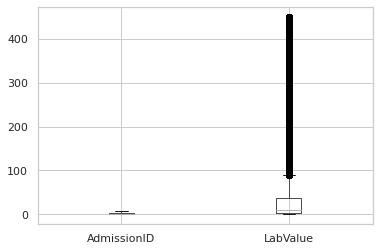

In [73]:
data_LabsCorePopulatedTable.boxplot();

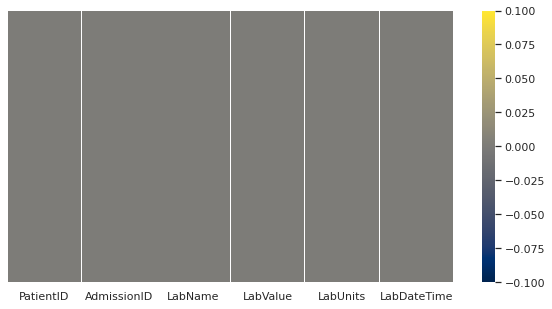

In [74]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.heatmap(data_LabsCorePopulatedTable.isnull(),yticklabels=False,cbar=True,cmap='cividis')

In [75]:
data_LabName=data_LabsCorePopulatedTable.groupby(by=['LabName'])['AdmissionID'].mean()
data_LabName

LabName
CBC: ABSOLUTE LYMPHOCYTES        2.664769
CBC: ABSOLUTE NEUTROPHILS        2.653894
CBC: BASOPHILS                   2.673618
CBC: EOSINOPHILS                 2.675024
CBC: HEMATOCRIT                  2.667082
CBC: HEMOGLOBIN                  2.670529
CBC: LYMPHOCYTES                 2.657812
CBC: MCH                         2.661548
CBC: MCHC                        2.683948
CBC: MEAN CORPUSCULAR VOLUME     2.674016
CBC: MONOCYTES                   2.662512
CBC: NEUTROPHILS                 2.658189
CBC: PLATELET COUNT              2.683979
CBC: RDW                         2.657152
CBC: RED BLOOD CELL COUNT        2.665406
CBC: WHITE BLOOD CELL COUNT      2.665005
METABOLIC: ALBUMIN               2.633979
METABOLIC: ALK PHOS              2.675650
METABOLIC: ALT/SGPT              2.659905
METABOLIC: ANION GAP             2.668667
METABOLIC: AST/SGOT              2.669393
METABOLIC: BILI TOTAL            2.656191
METABOLIC: BUN                   2.657061
METABOLIC: CALCIUM        

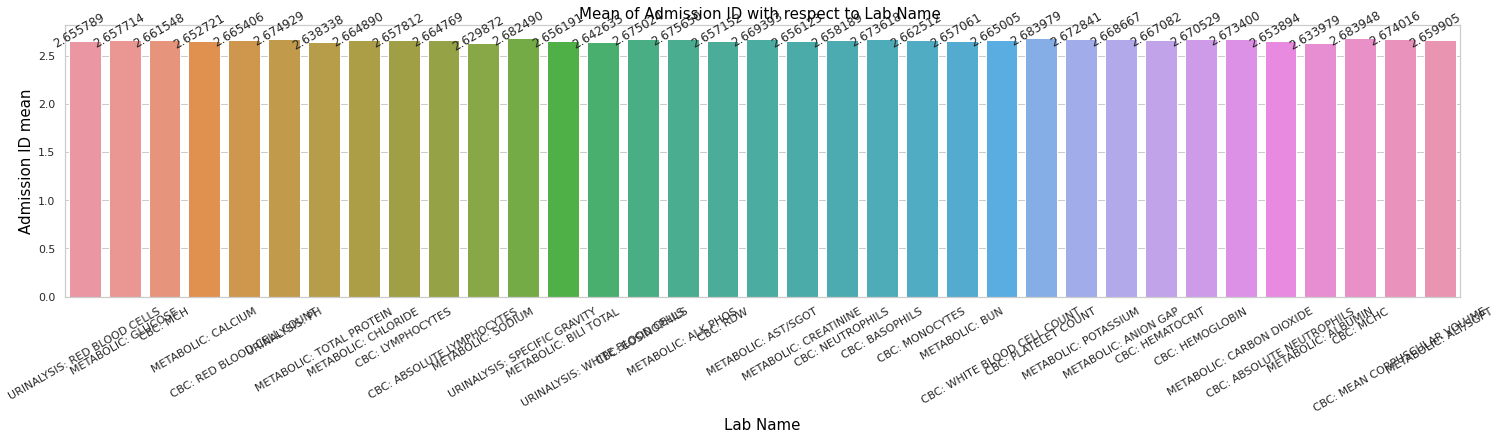

In [95]:
plt.figure(figsize=(25,5))
splot=sns.barplot(data_LabsCorePopulatedTable['LabName'],data_LabsCorePopulatedTable['AdmissionID'],ci=True)
plt.xticks(rotation=30)
plt.xlabel("Lab Name",fontsize=15,color='black')
plt.ylabel("Admission ID mean",fontsize=15,color='black')
plt.title("Mean of Admission ID with respect to Lab Name ",fontdict={'fontsize':15,'color':'black'})
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.6f'), (p.get_x() + p.get_width() / 3., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points',rotation=30)

In [77]:
data_LabName=data_LabsCorePopulatedTable.groupby(by=['LabName'])['AdmissionID'].count()
data_LabName

LabName
CBC: ABSOLUTE LYMPHOCYTES        3162
CBC: ABSOLUTE NEUTROPHILS        3210
CBC: BASOPHILS                   3165
CBC: EOSINOPHILS                 3191
CBC: HEMATOCRIT                  3211
CBC: HEMOGLOBIN                  3193
CBC: LYMPHOCYTES                 3162
CBC: MCH                         3191
CBC: MCHC                        3202
CBC: MEAN CORPUSCULAR VOLUME     3175
CBC: MONOCYTES                   3129
CBC: NEUTROPHILS                 3224
CBC: PLATELET COUNT              3177
CBC: RDW                         3188
CBC: RED BLOOD CELL COUNT        3174
CBC: WHITE BLOOD CELL COUNT      3209
METABOLIC: ALBUMIN               3202
METABOLIC: ALK PHOS              3154
METABOLIC: ALT/SGPT              3155
METABOLIC: ANION GAP             3166
METABOLIC: AST/SGOT              3179
METABOLIC: BILI TOTAL            3182
METABOLIC: BUN                   3158
METABOLIC: CALCIUM               3179
METABOLIC: CARBON DIOXIDE        3218
METABOLIC: CHLORIDE              3190
META

Text(0.5, 1.0, 'Lab Name v/s Admission ID count ')

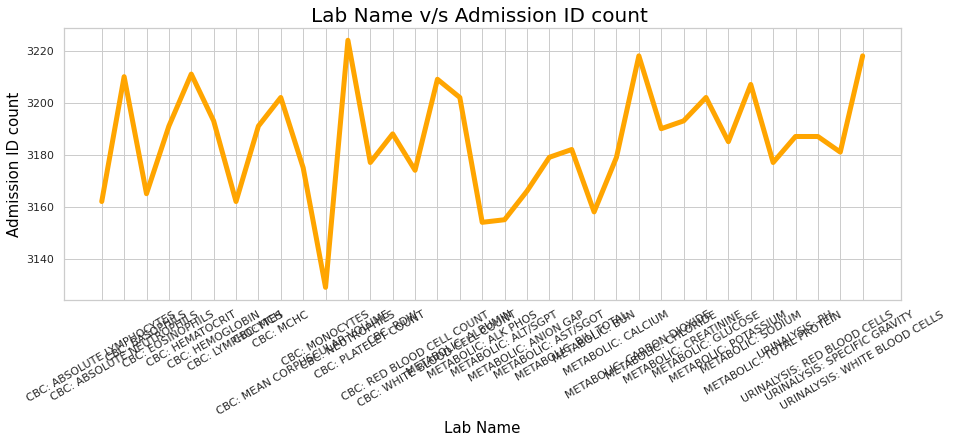

In [92]:
plt.figure(figsize=(15,5))
splot= plt.plot(data_LabName,color='orange',lw=5)
plt.xticks(rotation=30)
plt.xlabel("Lab Name",fontsize=15,color='black')
plt.ylabel("Admission ID count",fontsize=15,color='black')
plt.title("Lab Name v/s Admission ID count ",fontdict={'fontsize':20,'color':'black'})

In [79]:
data_LabValue=data_LabsCorePopulatedTable.groupby(by=['LabValue'])['AdmissionID'].count()
data_LabValue

LabValue
0.0       928
0.1      2435
0.2      2335
0.3      1315
0.4      1361
         ... 
449.1       1
449.2       1
449.4       1
449.5       2
449.9       2
Name: AdmissionID, Length: 3354, dtype: int64

In [82]:
data_LabValue1=data_LabsCorePopulatedTable.groupby(by=['AdmissionID'])['LabValue'].mean()
data_LabValue1

AdmissionID
1    35.087954
2    34.855360
3    35.118629
4    34.872122
5    35.036855
6    35.211311
7    34.592761
Name: LabValue, dtype: float64

Text(0.5, 1.0, 'Admission ID v/s Lab Value mean')

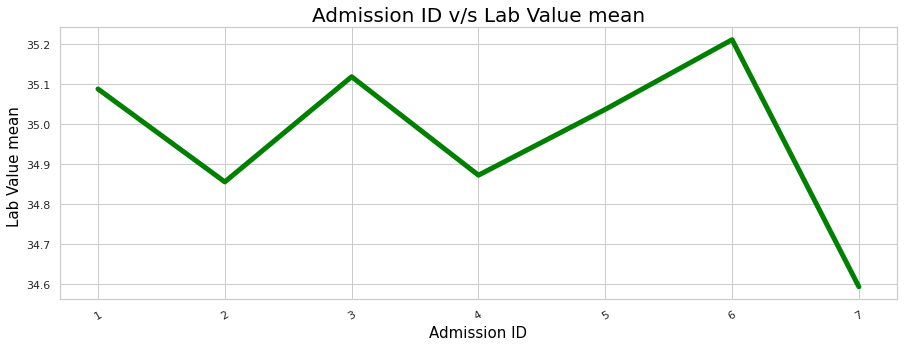

In [94]:
plt.figure(figsize=(15,5))
splot= plt.plot(data_LabValue1,color='green',lw=5)
plt.xticks(rotation=30)
plt.xlabel("Admission ID",fontsize=15,color='black')
plt.ylabel("Lab Value mean ",fontsize=15,color='black')
plt.title("Admission ID v/s Lab Value mean",fontdict={'fontsize':20,'color':'black'})

In [89]:
data_LabUnits=data_LabsCorePopulatedTable.groupby(by=['LabUnits'])['AdmissionID'].count()
data_LabUnits

LabUnits
%          12771
U/L         9488
fl          3175
g/dl        3202
gm/dL       6379
gm/dl       3193
k/cumm     22257
m/cumm      3174
mg/dL      15914
mmol/L     15966
no unit     6368
pg          3191
rbc/hpf     3187
wbc/hpf     3218
Name: AdmissionID, dtype: int64

In [97]:
data_LabUnits1=data_LabsCorePopulatedTable.groupby(by=['LabUnits'])['AdmissionID'].mean()
data_LabUnits1

LabUnits
%          2.660716
U/L        2.668318
fl         2.674016
g/dl       2.683948
gm/dL      2.636150
gm/dl      2.670529
k/cumm     2.668015
m/cumm     2.665406
mg/dL      2.655963
mmol/L     2.661907
no unit    2.678706
pg         2.661548
rbc/hpf    2.655789
wbc/hpf    2.642635
Name: AdmissionID, dtype: float64

Text(0.5, 1.0, 'Lab Units v/s Admission ID count')

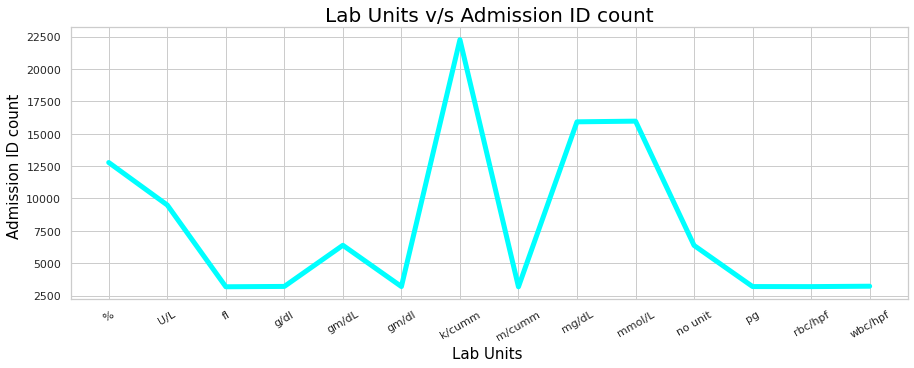

In [96]:
plt.figure(figsize=(15,5))
splot= plt.plot(data_LabUnits,color='cyan',lw=5)
plt.xticks(rotation=30)
plt.xlabel("Lab Units ",fontsize=15,color='black')
plt.ylabel("Admission ID count ",fontsize=15,color='black')
plt.title("Lab Units v/s Admission ID count",fontdict={'fontsize':20,'color':'black'})

Text(0.5, 1.0, 'Lab Units v/s Admission ID mean')

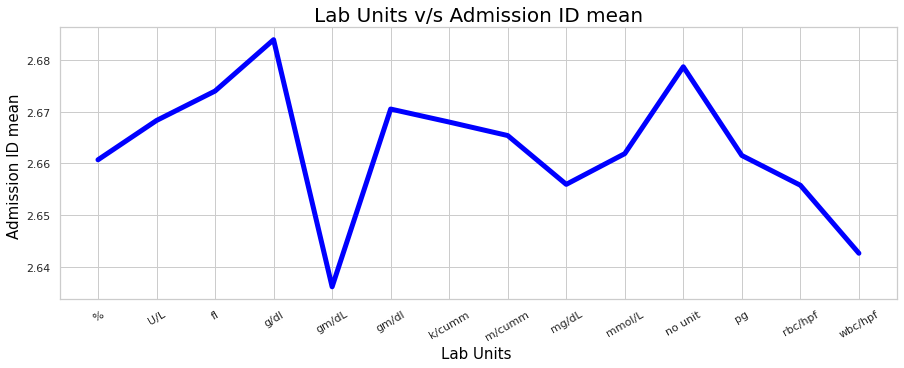

In [98]:
plt.figure(figsize=(15,5))
splot= plt.plot(data_LabUnits1,color='blue',lw=5)
plt.xticks(rotation=30)
plt.xlabel("Lab Units ",fontsize=15,color='black')
plt.ylabel("Admission ID mean ",fontsize=15,color='black')
plt.title("Lab Units v/s Admission ID mean",fontdict={'fontsize':20,'color':'black'})

# ---------------------------------------------------------------------------------------------------------------

## 4] PatientCorePopulatedTable

### 4.1) Load the dataset

In [107]:
data_PatientCorePopulatedTable=pd.read_csv("/home/admin/Desktop/100-EMR-data/PatientCorePopulatedTable.txt",sep="\t")
data_PatientCorePopulatedTable.head()

,PatientID,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,PatientLanguage,PatientPopulationPercentageBelowPoverty
0,FB2ABB23-C9D0-4D09-8464-49BF0B982F0F,Male,1947-12-28 02:45:40.547,Unknown,Married,Icelandic,18.08
1,64182B95-EB72-4E2B-BE77-8050B71498CE,Male,1952-01-18 19:51:12.917,African American,Separated,English,13.03
2,DB22A4D9-7E4D-485C-916A-9CD1386507FB,Female,1970-07-25 13:04:20.717,Asian,Married,English,6.67
3,6E70D84D-C75F-477C-BC37-9177C3698C66,Male,1979-01-04 05:45:29.580,White,Married,English,16.09
4,C8556CC0-32FC-4CA5-A8CD-9CCF38816167,Female,1921-04-11 11:39:49.197,White,Married,English,18.20


In [108]:
data_PatientCorePopulatedTable.tail()

,PatientID,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,PatientLanguage,PatientPopulationPercentageBelowPoverty
95,135C831F-7DA5-46C0-959C-EBCBD8810B43,Male,1971-05-13 04:40:05.623,White,Unknown,Spanish,12.38
96,8856096E-E59C-4156-A767-C091AF799C80,Female,1988-11-25 02:59:36.373,White,Divorced,English,11.08
97,6623F5D6-D581-4268-9F9B-21612FBBF7B5,Female,1943-02-17 15:36:13.787,Asian,Single,Spanish,14.49
98,65A7FBE0-EA9F-49E9-9824-D8F3AD98DAC0,Female,1962-11-30 06:28:33.110,White,Separated,Spanish,17.98
99,FB909FAE-72DD-4F6F-9828-D92183DF185F,Male,1940-07-15 12:18:41.080,White,Single,Spanish,14.90


### 4.2) EDA Steps

In [109]:
data_PatientCorePopulatedTable.size

700

In [110]:
data_PatientCorePopulatedTable.shape

(100, 7)

In [111]:
data_PatientCorePopulatedTable.dtypes

PatientID                                   object
PatientGender                               object
PatientDateOfBirth                          object
PatientRace                                 object
PatientMaritalStatus                        object
PatientLanguage                             object
PatientPopulationPercentageBelowPoverty    float64
dtype: object

In [112]:
data_PatientCorePopulatedTable.columns

Index(['PatientID', 'PatientGender', 'PatientDateOfBirth', 'PatientRace',
       'PatientMaritalStatus', 'PatientLanguage',
       'PatientPopulationPercentageBelowPoverty'],
      dtype='object')

In [113]:
data_PatientCorePopulatedTable.count()

PatientID                                  100
PatientGender                              100
PatientDateOfBirth                         100
PatientRace                                100
PatientMaritalStatus                       100
PatientLanguage                            100
PatientPopulationPercentageBelowPoverty    100
dtype: int64

In [114]:
data_PatientCorePopulatedTable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   PatientID                                100 non-null    object 
 1   PatientGender                            100 non-null    object 
 2   PatientDateOfBirth                       100 non-null    object 
 3   PatientRace                              100 non-null    object 
 4   PatientMaritalStatus                     100 non-null    object 
 5   PatientLanguage                          100 non-null    object 
 6   PatientPopulationPercentageBelowPoverty  100 non-null    float64
dtypes: float64(1), object(6)
memory usage: 5.6+ KB


In [115]:
data_PatientCorePopulatedTable.describe()

,PatientPopulationPercentageBelowPoverty
count,100.000000
mean,22.102500
std,23.327656
min,1.700000
25%,12.702500
50%,15.435000
75%,18.687500
max,98.400000


In [116]:
data_PatientCorePopulatedTable.isna().sum().to_frame().T

,PatientID,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,PatientLanguage,PatientPopulationPercentageBelowPoverty
0,0,0,0,0,0,0,0


In [117]:
Counter(data_PatientCorePopulatedTable.PatientID)

Counter({'FB2ABB23-C9D0-4D09-8464-49BF0B982F0F': 1,
         '64182B95-EB72-4E2B-BE77-8050B71498CE': 1,
         'DB22A4D9-7E4D-485C-916A-9CD1386507FB': 1,
         '6E70D84D-C75F-477C-BC37-9177C3698C66': 1,
         'C8556CC0-32FC-4CA5-A8CD-9CCF38816167': 1,
         '7FD13988-E58A-4A5C-8680-89AC200950FA': 1,
         'C60FE675-CA52-4C55-A233-F4B27E94987F': 1,
         'B39DC5AC-E003-4E6A-91B6-FC07625A1285': 1,
         'FA157FA5-F488-4884-BF87-E144630D595C': 1,
         'B7E9FC4C-5182-4A34-954E-CEF5FC07E96D': 1,
         '1A40AF35-C6D4-4D46-B475-A15D84E8A9D5': 1,
         'DA6CECFF-DE13-4C4C-919F-64E1A2B76C9D': 1,
         '0A9BA3E4-CF3C-49C4-9774-5EEA2EE7D123': 1,
         '7C788499-7798-484B-A027-9FCDC4C0DADB': 1,
         'C54B5AAD-98E8-472D-BAA0-638D9F3BD024': 1,
         '6985D824-3269-4D12-A9DD-B932D640E26E': 1,
         'D8B53AA2-7953-4477-9EA4-68400EBAAC5C': 1,
         'DB92CDC6-FA9B-4492-BC2C-0C588AD78956': 1,
         '25B786AF-0F99-478C-9CFA-0EA607E45834': 1,
         'F0

In [118]:
Counter(data_PatientCorePopulatedTable.PatientGender)

Counter({'Male': 48, 'Female': 52})

In [119]:
Counter(data_PatientCorePopulatedTable.PatientRace)

Counter({'Unknown': 13, 'African American': 15, 'Asian': 23, 'White': 49})

In [120]:
Counter(data_PatientCorePopulatedTable.PatientLanguage)

Counter({'Icelandic': 12, 'English': 64, 'Spanish': 18, 'Unknown': 6})

In [121]:
Counter(data_PatientCorePopulatedTable.PatientMaritalStatus)

Counter({'Married': 45,
         'Separated': 5,
         'Single': 32,
         'Divorced': 11,
         'Unknown': 6,
         'Widowed': 1})

In [122]:
Counter(data_PatientCorePopulatedTable.PatientPopulationPercentageBelowPoverty)

Counter({18.08: 1,
         13.03: 1,
         6.67: 1,
         16.09: 1,
         18.2: 1,
         12.41: 1,
         12.8: 1,
         15.31: 1,
         16.32: 1,
         11.43: 1,
         11.25: 1,
         83.75: 1,
         14.28: 1,
         11.89: 1,
         94.0: 1,
         12.01: 1,
         16.89: 1,
         1.7: 1,
         93.6: 1,
         15.72: 1,
         13.1: 1,
         14.87: 1,
         13.97: 1,
         19.22: 1,
         16.71: 1,
         7.59: 1,
         18.05: 2,
         16.24: 1,
         14.49: 2,
         11.16: 1,
         14.07: 1,
         17.72: 1,
         18.65: 1,
         4.34: 1,
         88.66: 1,
         16.76: 1,
         14.81: 1,
         16.86: 1,
         19.5: 1,
         14.03: 1,
         82.08: 1,
         18.88: 1,
         19.52: 2,
         15.02: 1,
         10.8: 1,
         16.88: 1,
         19.41: 1,
         18.17: 1,
         10.87: 1,
         3.3: 1,
         4.51: 1,
         5.94: 1,
         8.81: 1,
         1



### 4.3) Detecting Outliers in PatientCorePopulatedTable

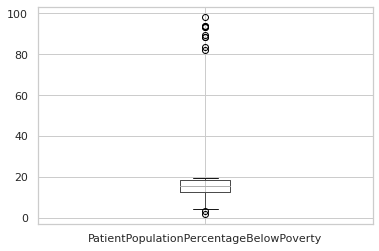

In [123]:
data_PatientCorePopulatedTable.boxplot();

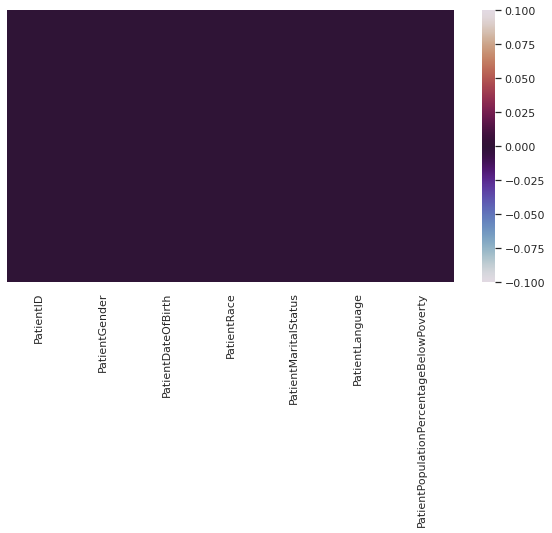

In [124]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.heatmap(data_PatientCorePopulatedTable.isnull(),yticklabels=False,cbar=True,cmap='twilight')

## Segreggating the patient's data with respect to various parameters

In [125]:
data_PatientGender=data_PatientCorePopulatedTable.groupby(by=['PatientGender'])['PatientID'].count()
data_PatientGender

PatientGender
Female    52
Male      48
Name: PatientID, dtype: int64

Text(0.5, 1.0, 'Count of Patient ID with respect to Patient Gender ')

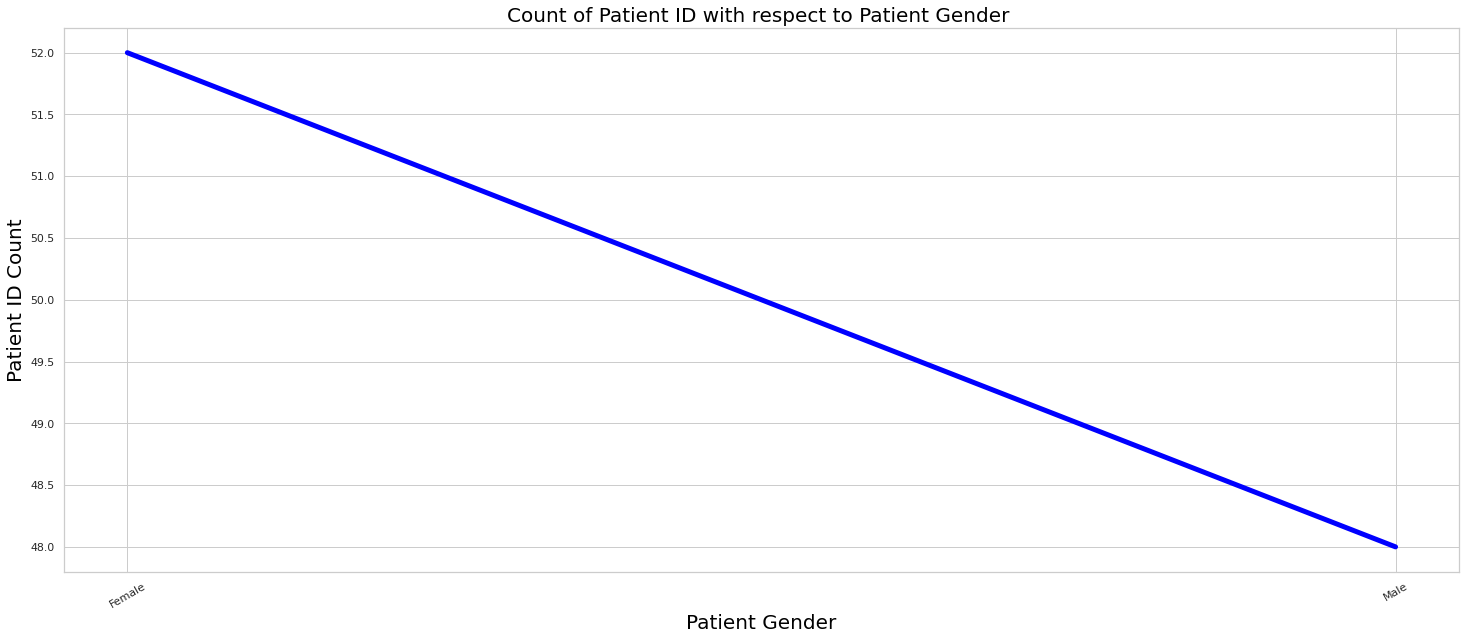

In [128]:
plt.figure(figsize=(25,10))
plt.plot(data_PatientGender,lw=5,color='blue')
plt.xticks(rotation=30)
plt.xlabel("Patient Gender",fontsize=20,color='black')
plt.ylabel("Patient ID Count",fontsize=20,color='black')
plt.title("Count of Patient ID with respect to Patient Gender ",fontdict={'fontsize':20,'color':'black'})

In [129]:
data_PatientRace=data_PatientCorePopulatedTable.groupby(by=['PatientRace'])['PatientID'].count()
data_PatientRace

PatientRace
African American    15
Asian               23
Unknown             13
White               49
Name: PatientID, dtype: int64

Text(0.5, 1.0, 'Count of Patient ID with respect to Patient Race ')

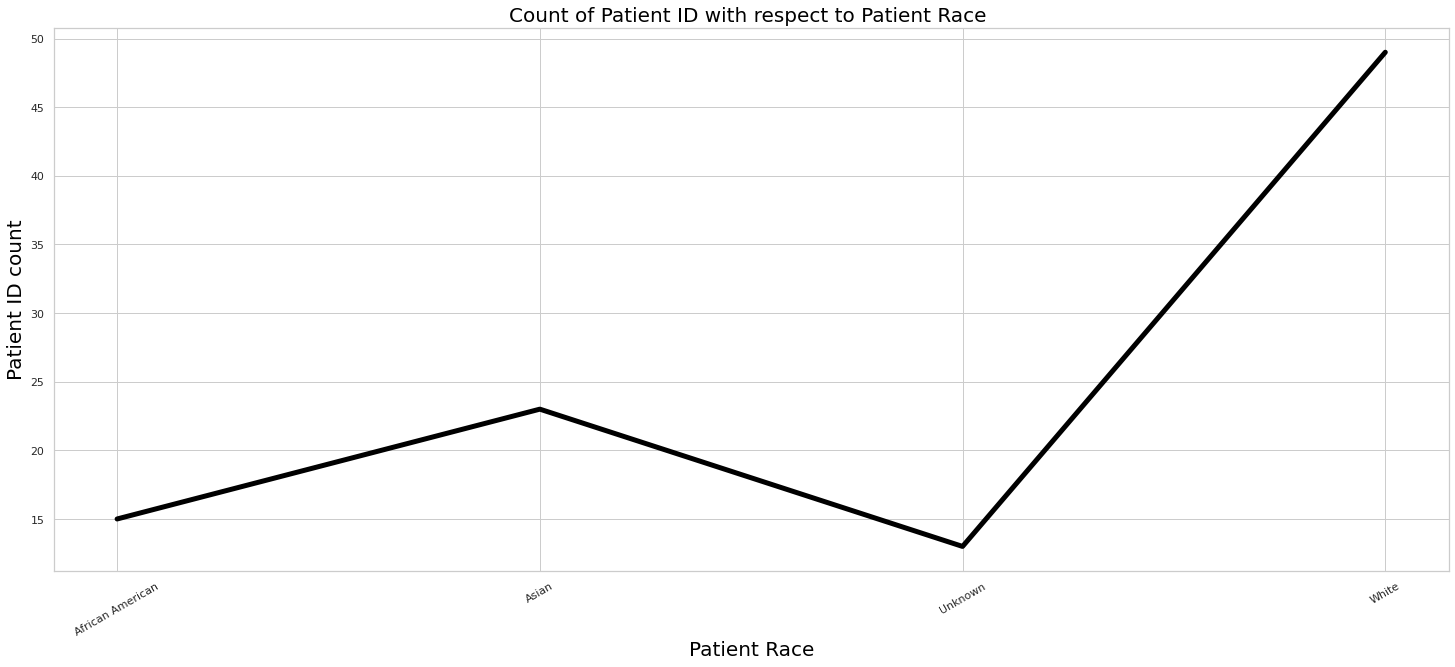

In [130]:
plt.figure(figsize=(25,10))
plt.plot(data_PatientRace,lw=5,color='black')
plt.xticks(rotation=30)
plt.xlabel("Patient Race",fontsize=20,color='black')
plt.ylabel("Patient ID count",fontsize=20,color='black')
plt.title("Count of Patient ID with respect to Patient Race ",fontdict={'fontsize':20,'color':'black'})

In [131]:
data_PatientMaritalStatus=data_PatientCorePopulatedTable.groupby(by=['PatientMaritalStatus'])['PatientID'].count()
data_PatientMaritalStatus

PatientMaritalStatus
Divorced     11
Married      45
Separated     5
Single       32
Unknown       6
Widowed       1
Name: PatientID, dtype: int64

Text(0.5, 1.0, 'Count of Patient ID with respect to Patient Marital Status')

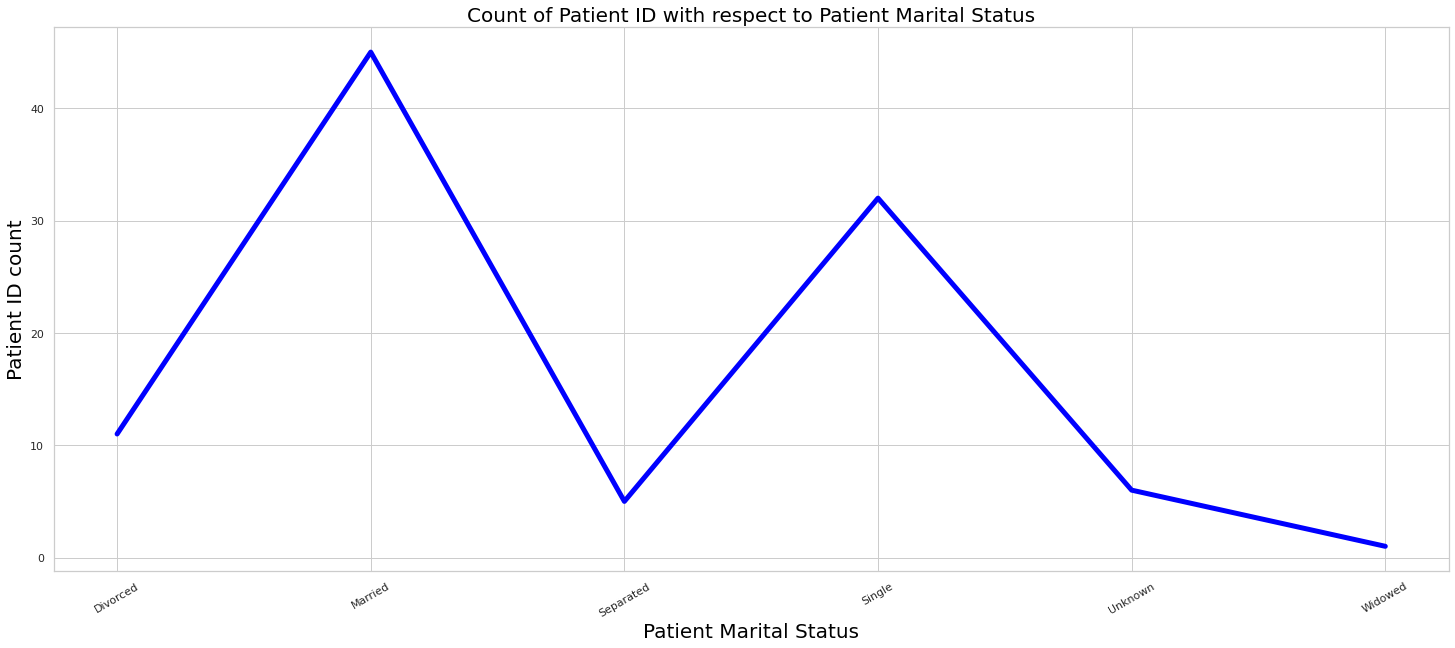

In [132]:
plt.figure(figsize=(25,10))
plt.plot(data_PatientMaritalStatus,lw=5,color='blue')
plt.xticks(rotation=30)
plt.xlabel("Patient Marital Status",fontsize=20,color='black')
plt.ylabel("Patient ID count",fontsize=20,color='black')
plt.title("Count of Patient ID with respect to Patient Marital Status",fontdict={'fontsize':20,'color':'black'})

In [133]:
data_PatientLanguage=data_PatientCorePopulatedTable.groupby(by=['PatientLanguage'])['PatientID'].count()
data_PatientLanguage

PatientLanguage
English      64
Icelandic    12
Spanish      18
Unknown       6
Name: PatientID, dtype: int64

Text(0.5, 1.0, 'Count of Patient ID with respect to Patient Language ')

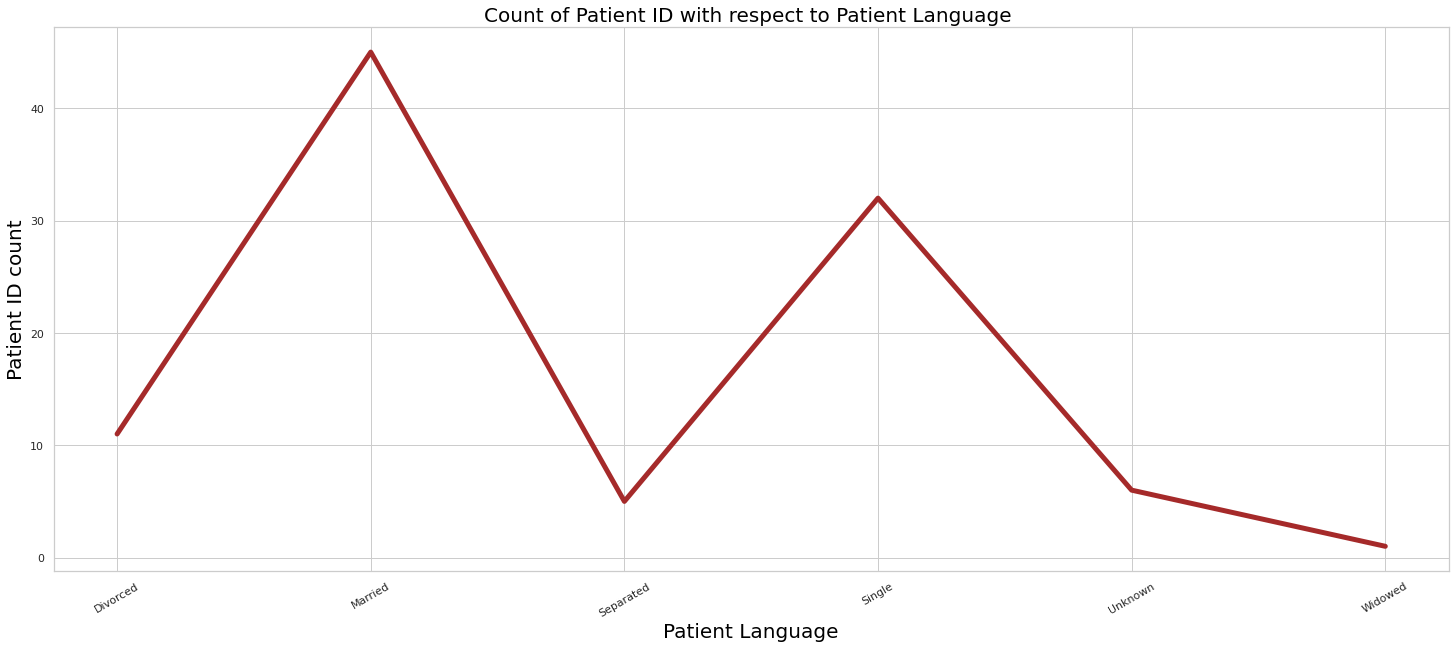

In [134]:
plt.figure(figsize=(25,10))
plt.plot(data_PatientMaritalStatus,lw=5,color='brown')
plt.xticks(rotation=30)
plt.xlabel("Patient Language",fontsize=20,color='black')
plt.ylabel("Patient ID count",fontsize=20,color='black')
plt.title("Count of Patient ID with respect to Patient Language ",fontdict={'fontsize':20,'color':'black'})

In [141]:
data_PatientBelowPoverty=data_PatientCorePopulatedTable.groupby(by=['PatientGender'])['PatientPopulationPercentageBelowPoverty'].count()
data_PatientBelowPoverty

PatientGender
Female    52
Male      48
Name: PatientPopulationPercentageBelowPoverty, dtype: int64

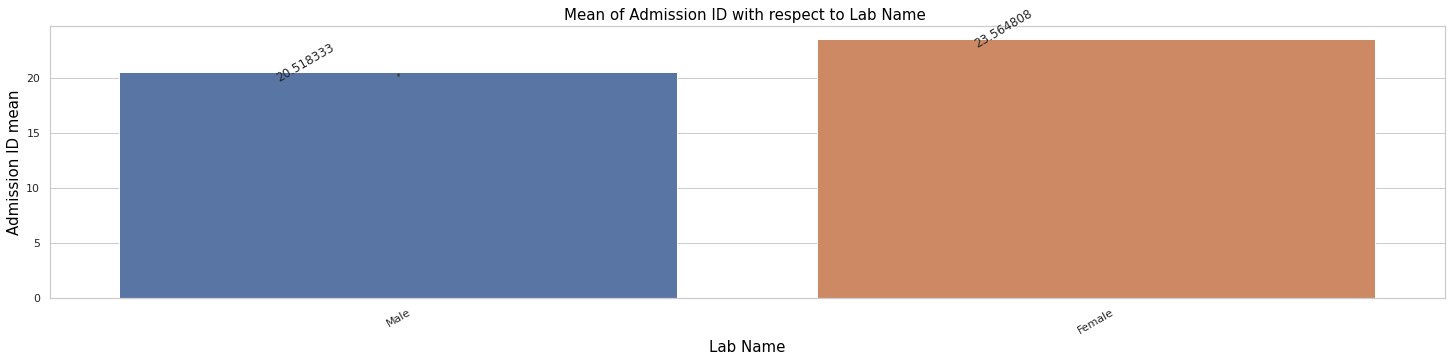

In [144]:
plt.figure(figsize=(25,5))
splot=sns.barplot(data_PatientCorePopulatedTable['PatientGender'],data_PatientCorePopulatedTable['PatientPopulationPercentageBelowPoverty'],ci=True)
plt.xticks(rotation=30)
plt.xlabel("Lab Name",fontsize=15,color='black')
plt.ylabel("Admission ID mean",fontsize=15,color='black')
plt.title("Mean of Admission ID with respect to Lab Name ",fontdict={'fontsize':15,'color':'black'})
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.6f'), (p.get_x() + p.get_width() / 3., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points',rotation=30)